In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

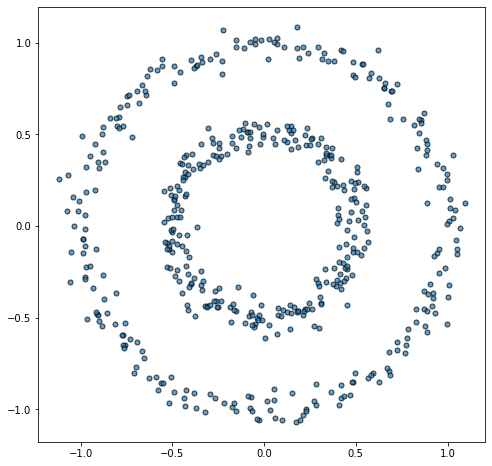

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            #c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

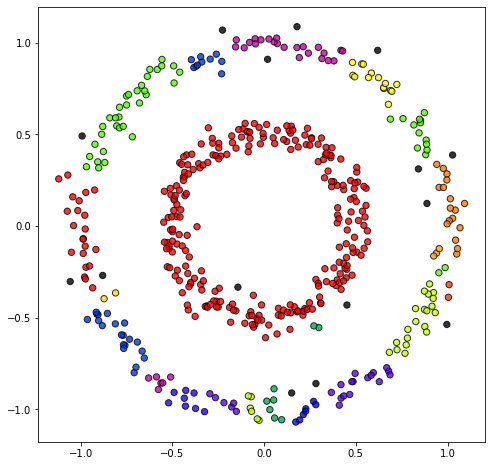

In [5]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [6]:
pogo.initial_idx_

2389

In [7]:
pogo.idx_

1254

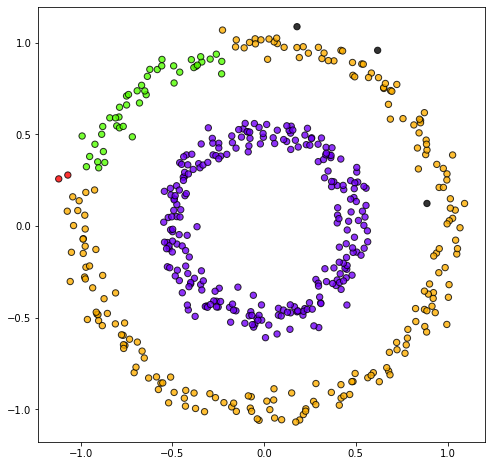

In [8]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [9]:
pogo.idx_

1996

In [10]:
pogo.candidates_[:20]

[2389,
 1996,
 1717,
 1254,
 1297,
 1933,
 1824,
 2320,
 1335,
 1228,
 1188,
 1028,
 1172,
 1483,
 1628,
 1592,
 1685,
 1388,
 2271,
 1141]

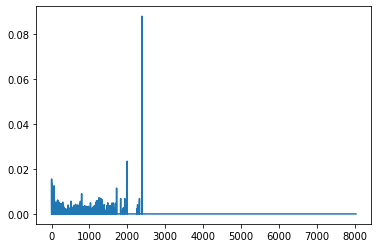

In [11]:
plt.plot(pogo.gap_vector_)

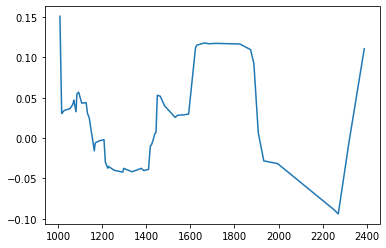

In [12]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


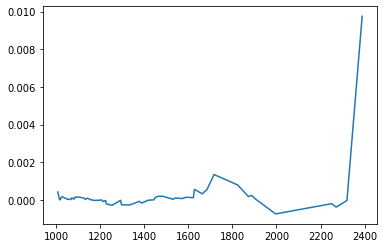

In [13]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [14]:
silhouette_indices[np.argmax(silhouette_gap)]

2389

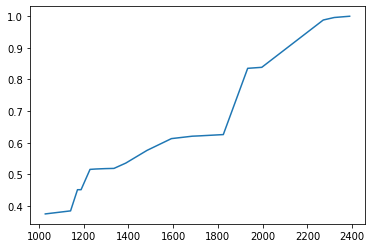

In [15]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [16]:
rand_indices[np.argmax(rand_array)]

2389

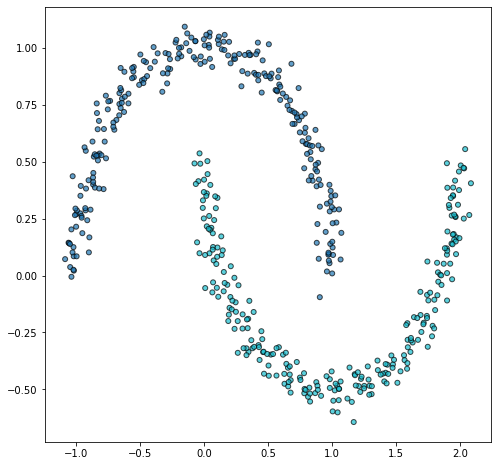

In [17]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

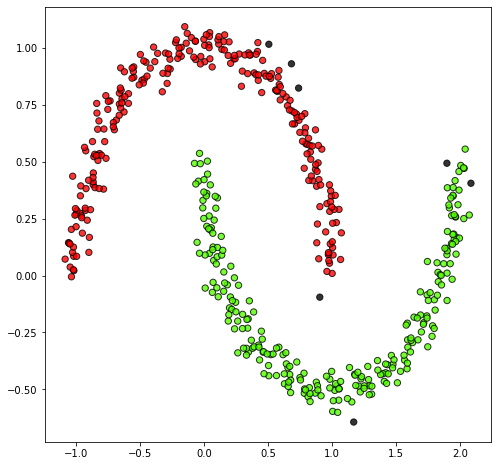

In [18]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [19]:
pogo.initial_idx_

3659

In [20]:
pogo.idx_

1734

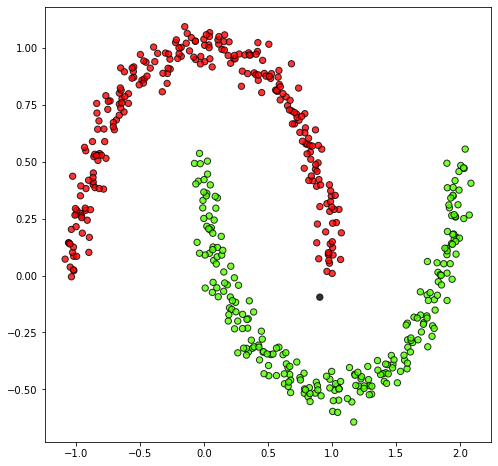

In [21]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [22]:
pogo.idx_

2621

In [23]:
pogo.candidates_[:10]

[3659, 2621, 2107, 1734, 1940, 1346, 2514, 1510, 1270, 1862]

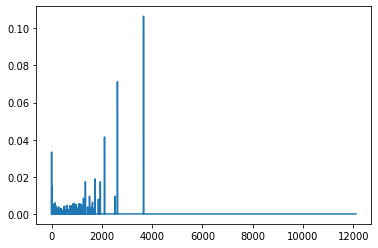

In [24]:
plt.plot(pogo.gap_vector_)

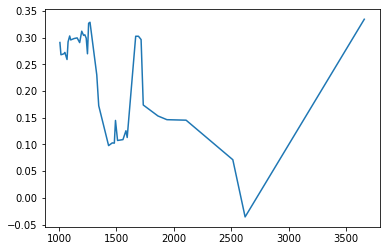

In [25]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(40)

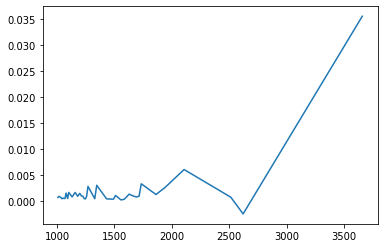

In [26]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [27]:
silhouette_indices[np.argmax(silhouette_gap)]

3659

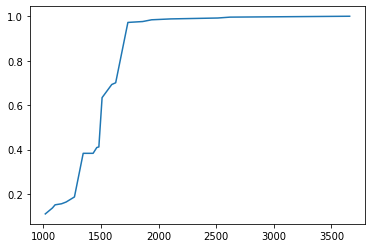

In [28]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [29]:
rand_indices[np.argmax(rand_array)]

3659

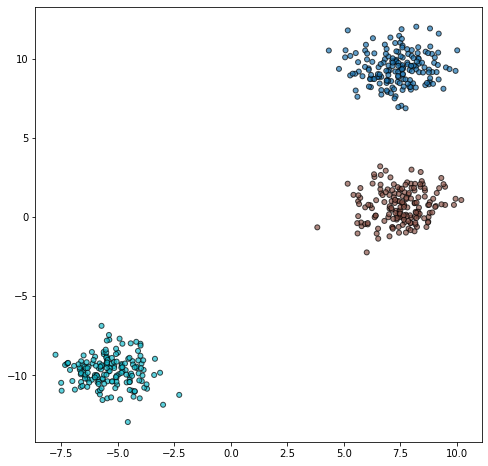

In [30]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

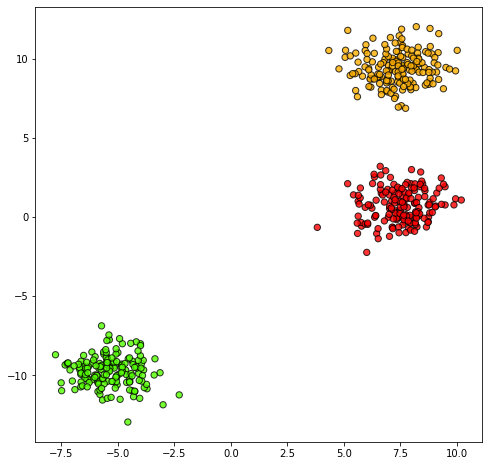

In [31]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [32]:
pogo.initial_idx_

22008

In [33]:
pogo.idx_

22008

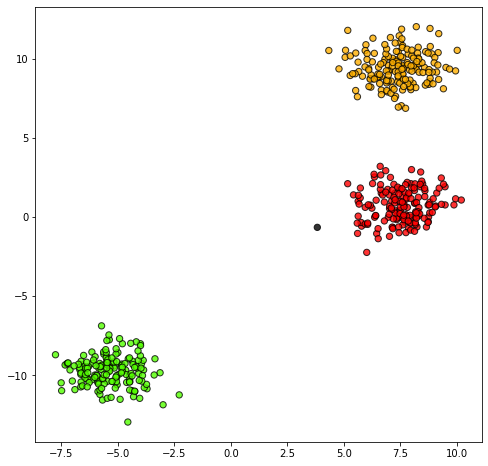

In [34]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [35]:
pogo.idx_

16771

In [36]:
pogo.candidates_[:20]

[22008,
 40162,
 16771,
 12286,
 5322,
 8881,
 6624,
 10585,
 4257,
 7996,
 3177,
 2924,
 2656,
 5107,
 4003,
 1805,
 3739,
 2105,
 2470,
 2355]

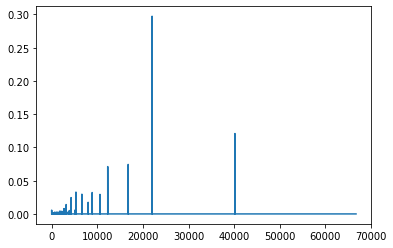

In [37]:
plt.plot(pogo.gap_vector_)

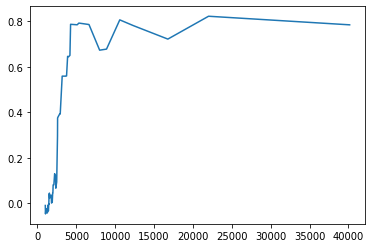

In [38]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

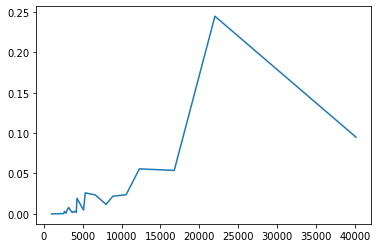

In [39]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [40]:
silhouette_indices[np.argmax(silhouette_gap)]

22008

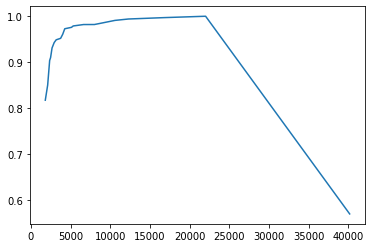

In [41]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [42]:
rand_indices[np.argmax(rand_array)]

22008

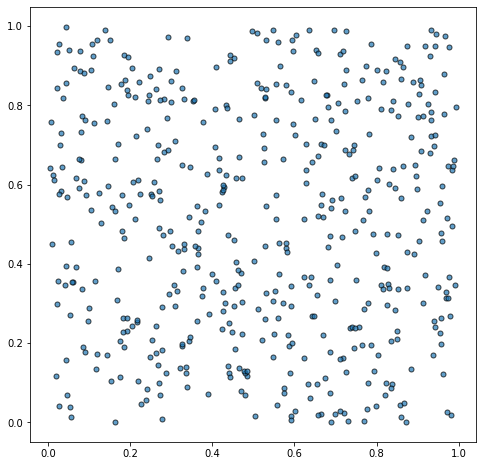

In [43]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

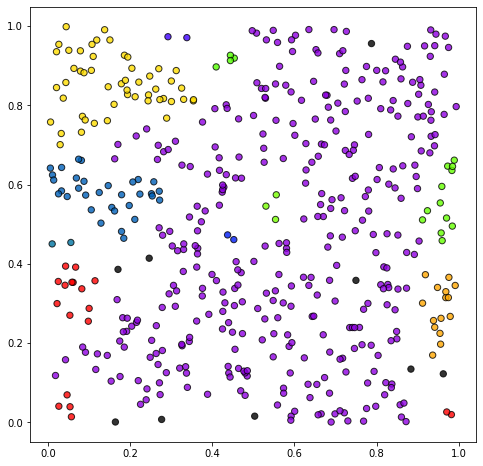

In [44]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [45]:
pogo.initial_idx_

1636

In [46]:
pogo.idx_

1033

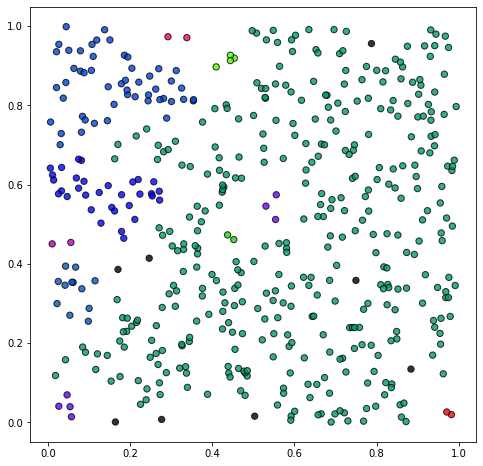

In [47]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [48]:
pogo.idx_

1114

In [49]:
pogo.candidates_[:20]

[1636,
 1114,
 1033,
 1226,
 1516,
 1194,
 1384,
 1455,
 1015,
 1345,
 1295,
 1171,
 1088,
 1214,
 1320,
 1432,
 2091,
 1104,
 1004,
 1161]

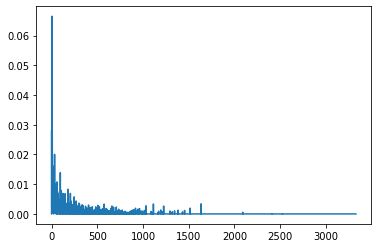

In [50]:
plt.plot(pogo.gap_vector_)

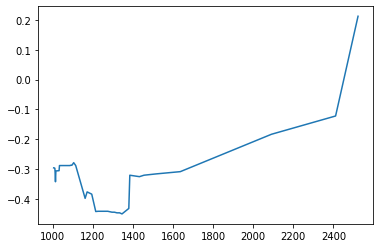

In [51]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


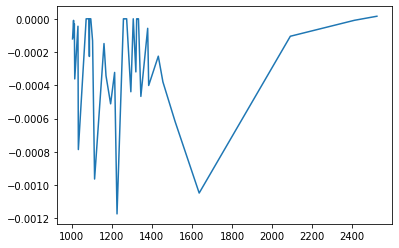

In [52]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [53]:
silhouette_indices[np.argmax(silhouette_gap)]

2523

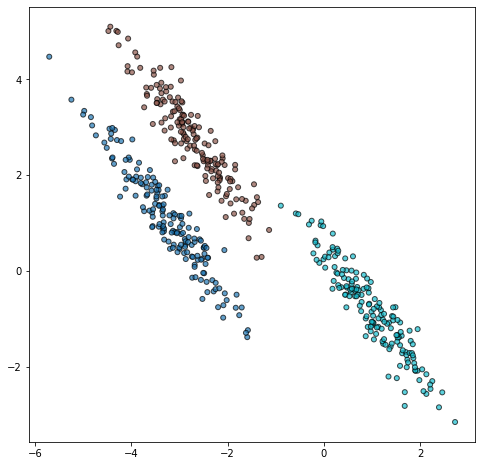

In [54]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

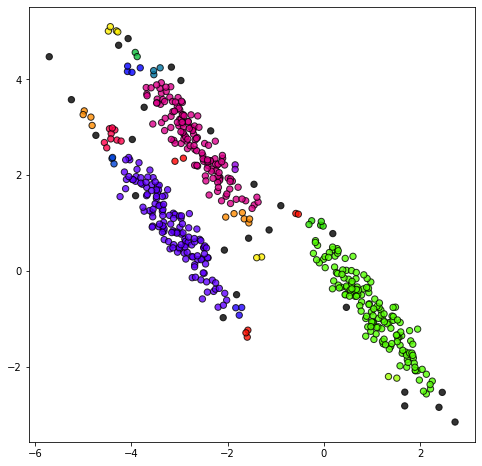

In [55]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [56]:
pogo.initial_idx_

4803

In [57]:
pogo.idx_

1590

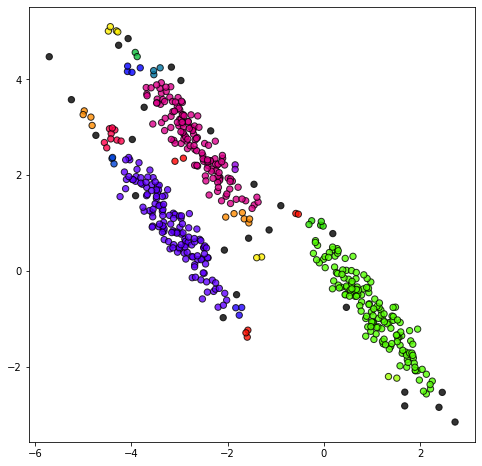

In [58]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [59]:
pogo.idx_

1590

In [60]:
pogo.candidates_[:20]

[4803,
 1590,
 8321,
 3035,
 7101,
 2643,
 4003,
 2482,
 1877,
 3436,
 4498,
 3770,
 6584,
 1241,
 2133,
 2329,
 1510,
 2843,
 1060,
 2249]

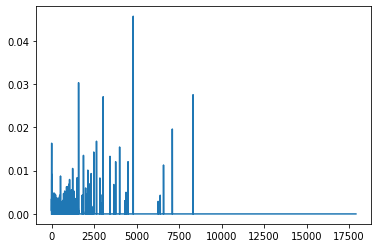

In [61]:
plt.plot(pogo.gap_vector_)

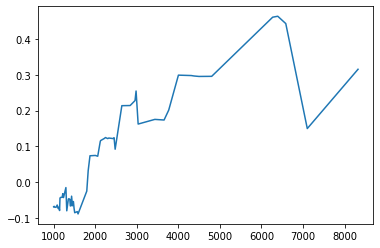

In [62]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


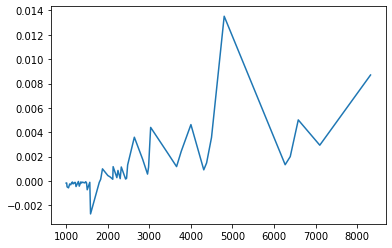

In [63]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [64]:
silhouette_indices[np.argmax(silhouette_gap)]

4803

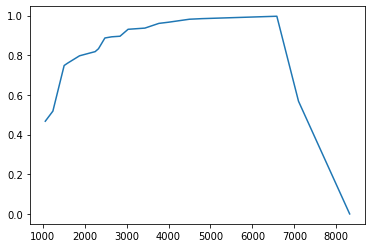

In [65]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [66]:
rand_indices[np.argmax(rand_array)]

6584

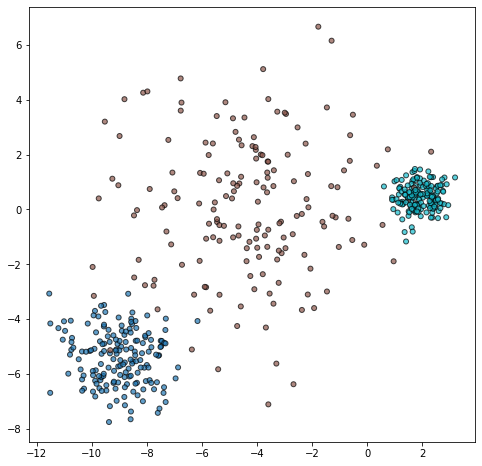

In [67]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

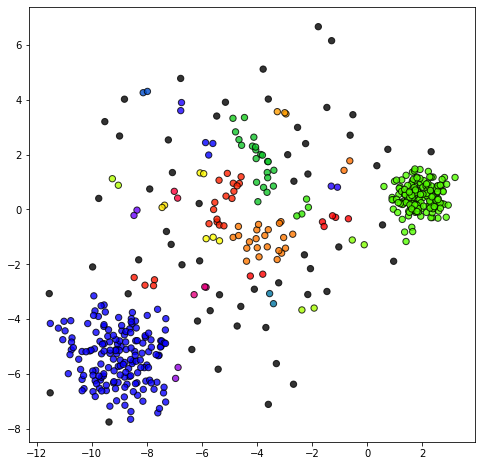

In [68]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [69]:
pogo.initial_idx_

18297

In [70]:
pogo.idx_

3849

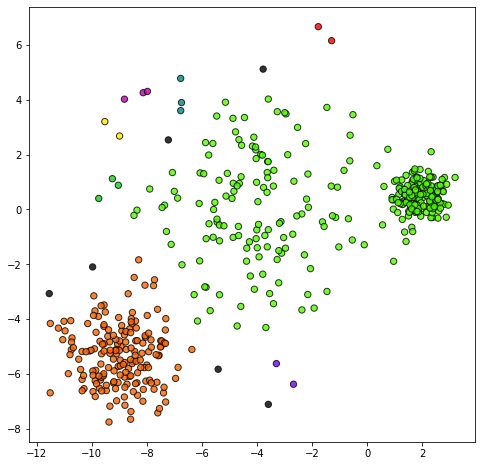

In [71]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [72]:
pogo.idx_

12260

In [73]:
pogo.candidates_[:20]

[18297,
 12260,
 4283,
 3849,
 5883,
 15860,
 2662,
 5369,
 8546,
 6926,
 6221,
 1340,
 2443,
 10186,
 2544,
 3485,
 4560,
 11139,
 9244,
 2213]

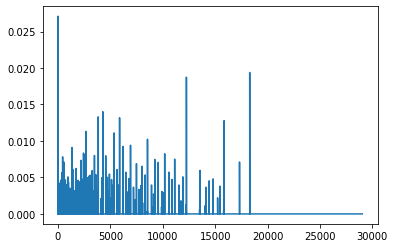

In [74]:
plt.plot(pogo.gap_vector_)

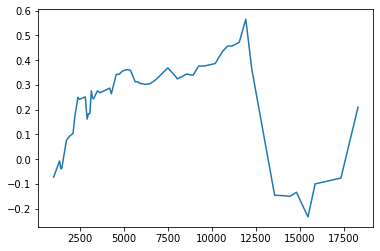

In [75]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


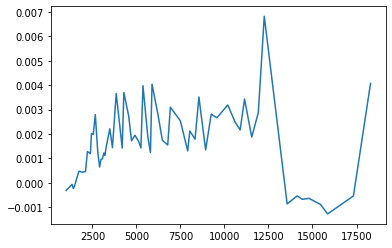

In [76]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [77]:
silhouette_indices[np.argmax(silhouette_gap)]

12260

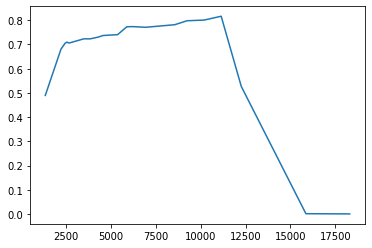

In [78]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [79]:
rand_indices[np.argmax(rand_array)]

11139

In [80]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

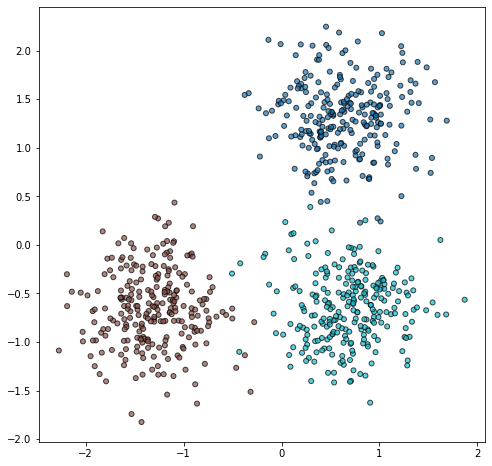

In [81]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

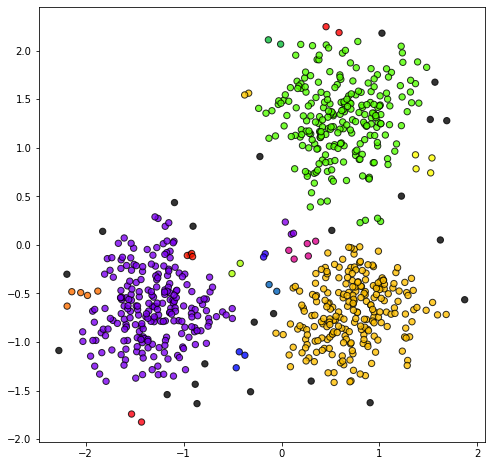

In [82]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [83]:
pogo.initial_idx_

3904

In [84]:
pogo.idx_

3904

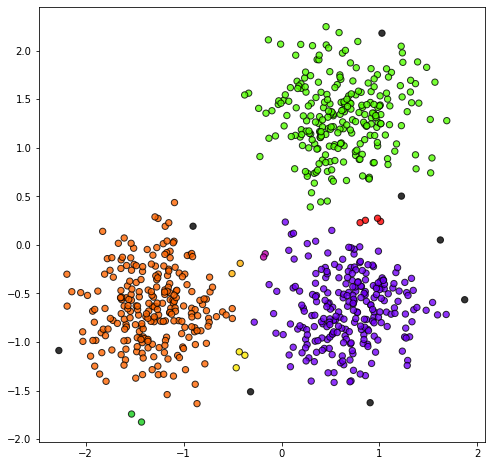

In [85]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [86]:
pogo.idx_

7424

In [87]:
pogo.candidates_[:20]

[3904,
 4182,
 7424,
 5875,
 4817,
 10681,
 9669,
 5532,
 3004,
 5290,
 2172,
 2569,
 6928,
 3227,
 3402,
 2659,
 4609,
 8461,
 15598,
 2429]

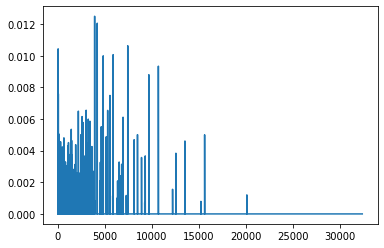

In [88]:
plt.plot(pogo.gap_vector_)

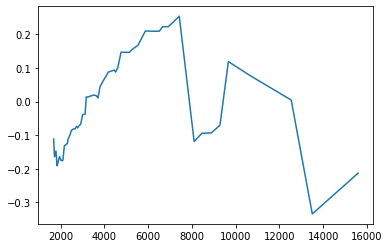

In [89]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [90]:
silhouette_indices[np.argmax(silhouette_array)]

7424

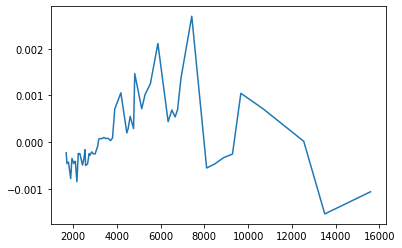

In [91]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [92]:
silhouette_indices[np.argmax(silhouette_gap)]

7424

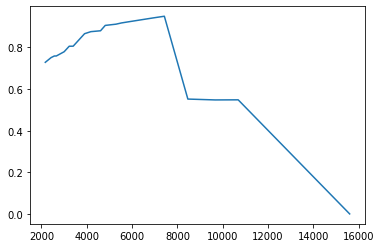

In [93]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [94]:
rand_indices[np.argmax(rand_array)]

7424

In [95]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [96]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [97]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


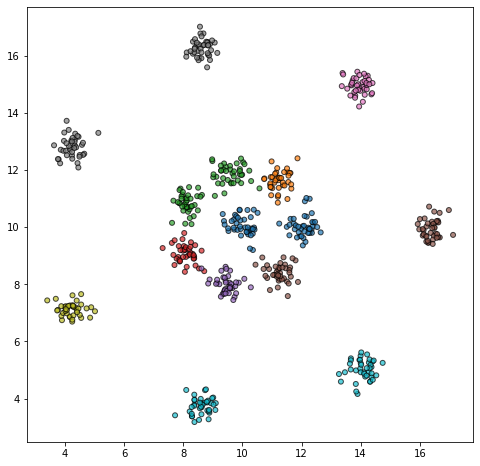

In [98]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

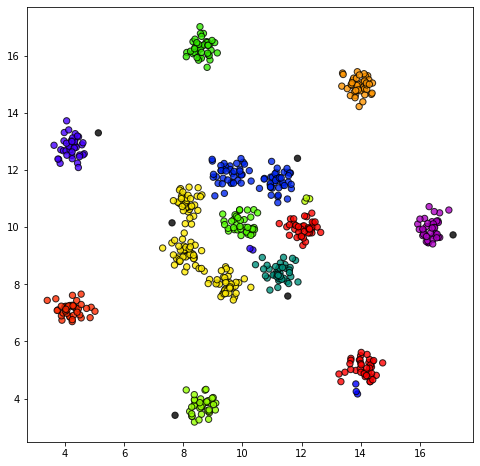

In [99]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [100]:
pogo.initial_idx_

7643

In [101]:
pogo.idx_

3807

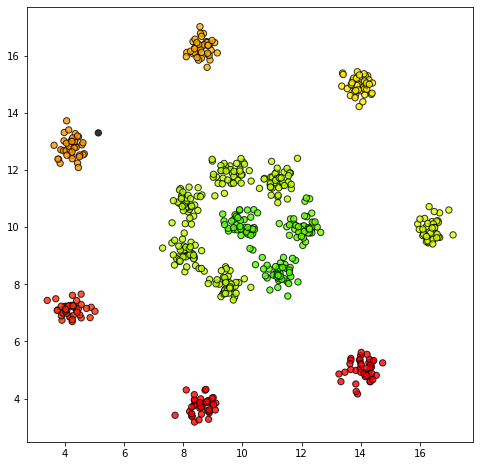

In [102]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [103]:
pogo.candidates_[:20]

[7643,
 6053,
 3807,
 4346,
 7259,
 5481,
 6889,
 3187,
 5236,
 4962,
 5887,
 1903,
 3481,
 2781,
 3613,
 4837,
 2606,
 2452,
 2933,
 3018]

In [104]:
pogo.idx_

6053

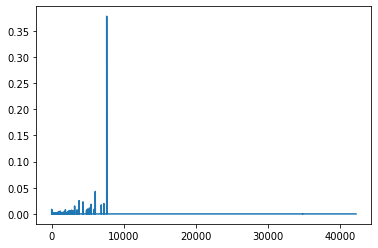

In [105]:
plt.plot(pogo.gap_vector_)

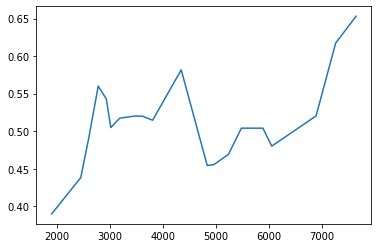

In [106]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


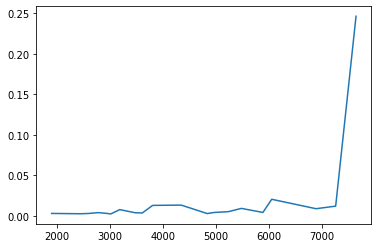

In [107]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [108]:
silhouette_indices[np.argmax(silhouette_gap)]

7643

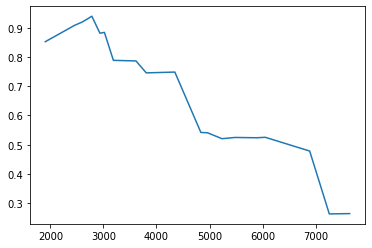

In [109]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [110]:
rand_indices[np.argmax(rand_array)]

2781

In [111]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


In [112]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

KeyboardInterrupt: 

In [ ]:
pogo.idx_

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [ ]:
pogo.idx_

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


In [ ]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [ ]:
rand_indices[np.argmax(rand_array)]